## Heart Disease Prediction

In [1]:
#import the library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE

In [75]:
#importing dataset
heart = pd.read_csv('dataset/framingham.csv')
heart.sample(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3313,0,52,3.0,1,9.0,NaN,0,0,0,275.0,102.0,70.5,20.40,65.0,NaN,0
3809,1,50,3.0,0,0.0,0.0,0,1,1,232.0,148.5,94.0,25.78,80.0,88.0,1
1839,0,61,3.0,0,0.0,0.0,0,0,0,340.0,121.0,78.0,23.33,65.0,73.0,0
2473,0,66,1.0,1,1.0,1.0,0,1,0,261.0,154.0,97.0,32.60,70.0,81.0,0
3456,0,52,3.0,1,20.0,0.0,0,1,0,287.0,139.0,88.0,26.55,110.0,NaN,1
2503,1,43,1.0,1,20.0,0.0,0,0,1,309.0,124.0,85.0,26.91,70.0,215.0,0
3687,1,40,2.0,1,20.0,0.0,0,0,0,186.0,131.0,81.0,22.14,86.0,87.0,0
4061,1,44,1.0,0,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN,0
2160,0,62,1.0,0,0.0,0.0,0,1,0,242.0,130.0,91.0,31.12,80.0,NaN,0
2835,0,40,1.0,1,50.0,NaN,0,0,0,220.0,124.0,79.0,20.70,90.0,57.0,0


In [4]:
#1. sex: the gender of the observations. The variable is a binary named “male” in the dataset.
#2. age: Age at the time of medical examination in years.
#3. education: A categorical variable of the participants education, with the levels: Some high school (1), 
#high school/GED (2), some college/vocational school (3), college (4)
#4. currentSmoker: Current cigarette smoking at the time of examinations
#5. cigsPerDay: Number of cigarettes smoked each day
#6. BPmeds: Use of Anti-hypertensive medication at exam
#7. prevalentStroke: Prevalent Stroke (0 = free of disease)
#8. prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
#9. diabetes: Diabetic according to criteria of first exam treated
#10. totChol: Total cholesterol (mg/dL)
#11. sysBP: Systoliclood Pressure (mmHg)
#12. diaBP: Diastolic blood pressure (mmHg)
#13. BMI: Body Mass Index, weight (kg)/height (m)^2
#14. heartRate: Heart rate (beats/minute)
#15. glucose: Blood glucose level (mg/dL)
#16. TenYearCHD(response variable): The 10 year risk of coronary heart disease(CHD).

In [5]:
#shape
heart.shape

(4240, 16)

In [6]:
#dtypes
heart.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
#Describe the relation between numerical value
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
#Column wise missing value 
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
#Replace the 0 in missing value
heart['cigsPerDay'].fillna(0,inplace=True)


C:\Users\narendra tekale\AppData\Local\Temp\ipykernel_1952\1318974127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart['cigsPerDay'].fillna(0,inplace=True)


In [11]:
#Rename the column
#[1=True,0=False]
#sex [1 = male, 0 = female]
heart.rename(columns={'male':'sex'},inplace=True)
heart.rename(columns={'TenYearCHD':'target'},inplace=True)
heart.sample(10)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
61,0,67,1.0,0,0.0,0.0,0,1,0,254.0,157.0,89.0,24.25,60.0,74.0,0
1347,0,58,4.0,1,0.0,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0
4185,1,58,1.0,0,0.0,0.0,0,0,0,NaN,116.5,71.0,27.04,70.0,86.0,0
3336,0,50,2.0,0,0.0,0.0,0,0,0,240.0,107.5,70.0,26.76,67.0,102.0,0
512,0,65,2.0,0,0.0,0.0,0,1,0,240.0,155.0,84.0,29.93,92.0,91.0,1
1393,1,44,1.0,1,10.0,0.0,0,0,0,220.0,105.0,70.0,21.01,58.0,68.0,0
1214,0,58,1.0,0,0.0,0.0,0,0,0,218.0,138.5,87.5,22.91,73.0,NaN,0
122,1,66,3.0,0,0.0,0.0,0,0,0,288.0,109.0,71.0,29.29,80.0,80.0,0
3920,1,38,1.0,1,9.0,0.0,0,0,0,305.0,114.0,80.0,28.61,75.0,71.0,0
1950,0,58,3.0,0,0.0,0.0,0,1,0,232.0,145.0,94.0,26.38,66.0,80.0,0


In [12]:
heart.drop(['education'],axis=1 , inplace=True)

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  target           4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [14]:
heart.dropna(subset=['BPMeds','totChol','BMI','heartRate','glucose'],inplace=True)

In [15]:
heart.shape

(3776, 15)

In [16]:
#Any repeating row in dataset
heart.duplicated().sum()

0

In [17]:
#sex [1 = male, 0 = female]
heart['sex'].value_counts()

sex
0    2094
1    1682
Name: count, dtype: int64

In [18]:
#[1=True,0=False]
heart['currentSmoker'].value_counts()

currentSmoker
0    1919
1    1857
Name: count, dtype: int64

In [19]:
#any row repeated in data
heart.duplicated().sum()

0

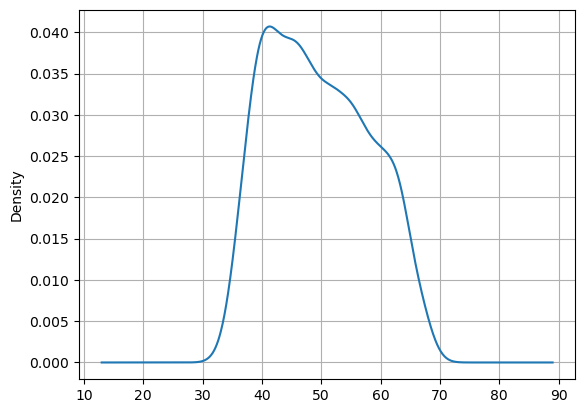

In [20]:
heart['age'].plot(kind='kde')
plt.grid()

In [21]:
#skewness is near 0 it is good things ,it's means age is normally distributed
heart['age'].skew()

0.22970706305253866

In [22]:
heart.skew()

sex                 0.219618
age                 0.229707
currentSmoker       0.032856
cigsPerDay          1.246564
BPMeds              5.493443
prevalentStroke    13.302469
prevalentHyp        0.814690
diabetes            5.837332
totChol             0.912013
sysBP               1.153361
diaBP               0.705687
BMI                 0.983324
heartRate           0.658397
glucose             6.236647
target              1.939239
dtype: float64

C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='totChol', ylabel='Density'>

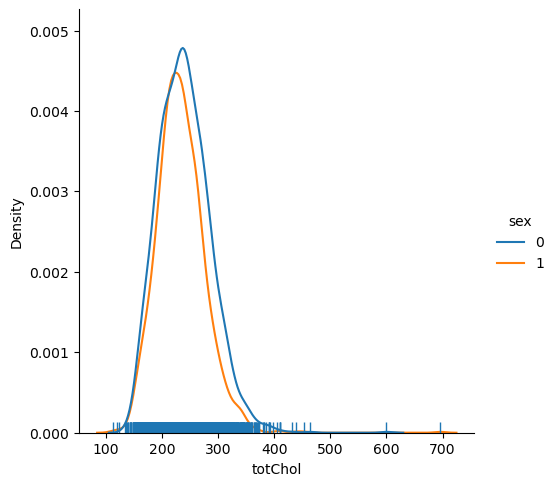

In [23]:
#KDE Plot
#Show the probability of particular value present in data
sns.displot(data=heart,kind='kde',x='totChol',hue='sex')
sns.rugplot(data=heart,x='totChol')

C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075:

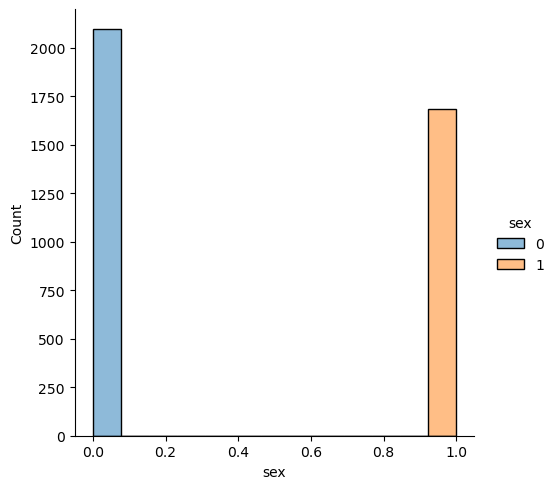

In [24]:
sns.displot(data=heart,x='sex',kind='hist',hue='sex')
heart['sex'].value_counts()
plt.show()

Axes(0.22375,0.11;0.5775x0.77)


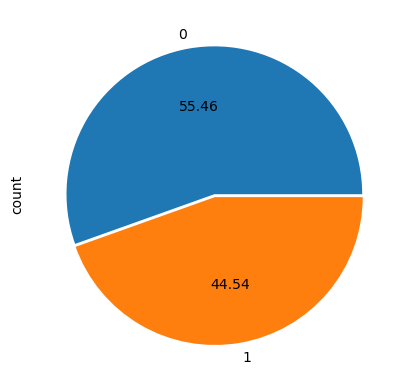

In [25]:
print(heart['sex'].value_counts().plot(kind='pie',autopct='%.2f',explode=[0,0.02]))

C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\narendra tekale\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075:

target
0    3202
1     574
Name: count, dtype: int64

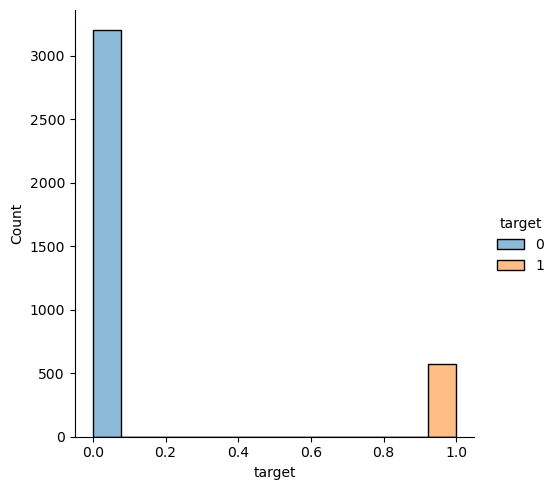

In [26]:
sns.displot(data=heart,x='target',kind='hist',hue='target')
heart['target'].value_counts()

Axes(0.22375,0.11;0.5775x0.77)


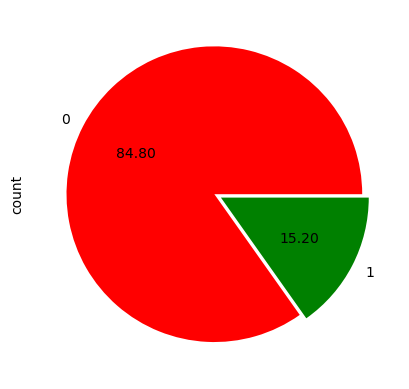

In [27]:
colors=('red','green')
print(heart['target'].value_counts().plot(kind='pie',autopct='%.2f',explode=[0,0.05],colors=colors))

In [28]:
heart.isnull().sum()

sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
target             0
dtype: int64

### Check weather the data is normally distributed or not

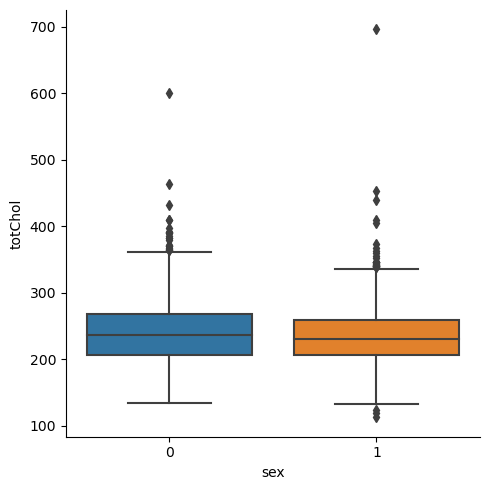

In [29]:
#Finding outlier of data
sns.catplot(data=heart,x='sex',y='totChol',kind='box')

In [30]:
heart[heart['totChol'] > 400]

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
194,0,42,0,0.0,0.0,0,0,0,464.0,128.0,87.0,22.90,72.0,72.0,1
543,1,47,1,18.0,0.0,0,1,0,439.0,145.0,74.0,22.42,100.0,90.0,1
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
1544,1,42,1,20.0,0.0,0,0,0,410.0,116.0,83.0,21.68,90.0,83.0,0
1937,0,59,0,0.0,0.0,0,1,0,410.0,142.0,79.0,25.58,78.0,90.0,0
2206,1,46,1,15.0,0.0,0,1,0,405.0,181.5,102.5,26.33,98.0,97.0,1
2985,0,57,0,0.0,1.0,0,1,0,432.0,153.0,85.0,26.13,98.0,75.0,1
3160,1,51,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0
3474,1,42,1,15.0,0.0,0,1,0,453.0,158.0,108.0,28.89,90.0,110.0,0
3806,0,52,1,20.0,0.0,0,0,0,410.0,105.0,67.5,27.33,75.0,90.0,0


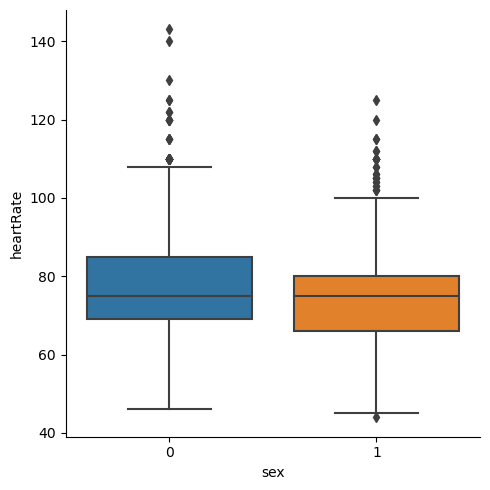

In [31]:
sns.catplot(data=heart,x='sex',y='heartRate',kind='box')

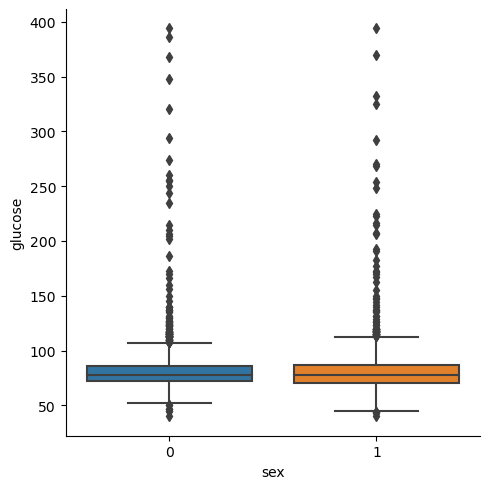

In [32]:
sns.catplot(data=heart,kind='box',x='sex',y='glucose')

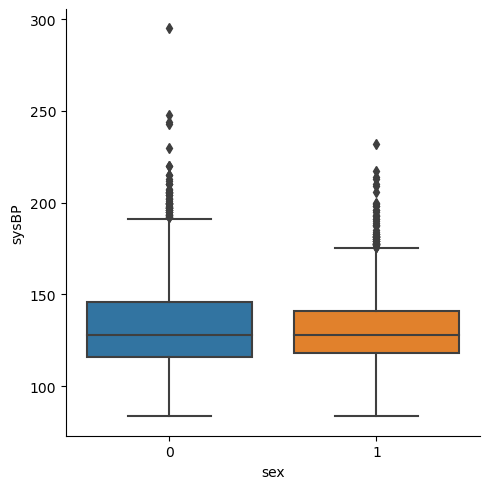

In [33]:
sns.catplot(data=heart,kind='box',x='sex',y='sysBP')

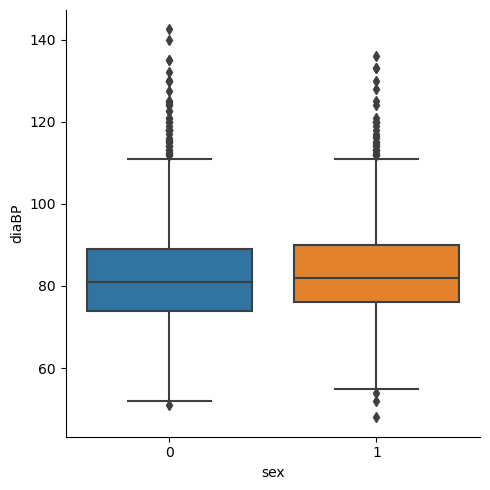

In [34]:
sns.catplot(data=heart,kind='box',x='sex',y='diaBP')

In [35]:
heart['totChol'].sort_values()

2525    113.0
4066    119.0
2443    124.0
2794    133.0
235     135.0
        ...  
543     439.0
3474    453.0
194     464.0
1111    600.0
3160    696.0
Name: totChol, Length: 3776, dtype: float64

## Remove Outlier

In [36]:
heart=heart.drop(index=heart[heart['totChol'] > 400].index)

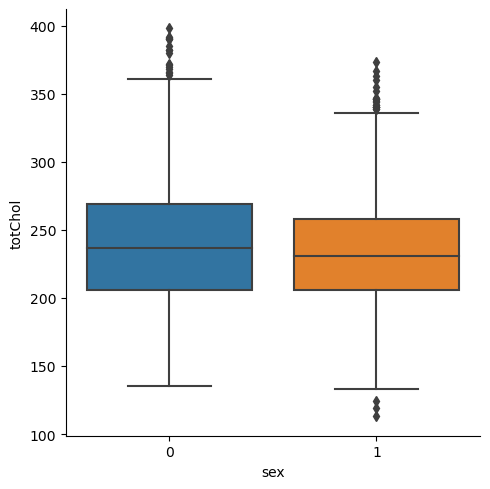

In [37]:
sns.catplot(data=heart,x='sex',y='totChol',kind='box')

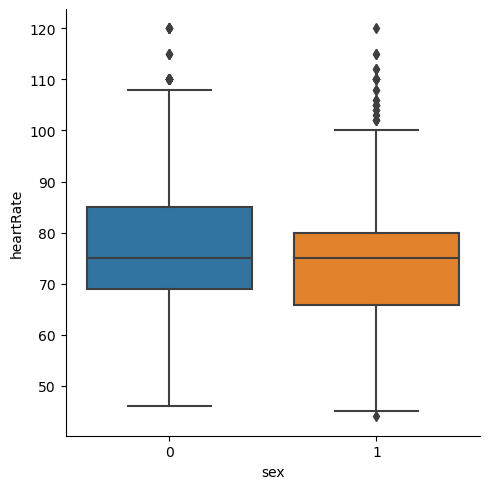

In [38]:
heart = heart.drop(index=heart[heart['heartRate'] > 120].index)
sns.catplot(data=heart,kind='box',x='sex',y='heartRate')

In [39]:
heart.shape

(3758, 15)

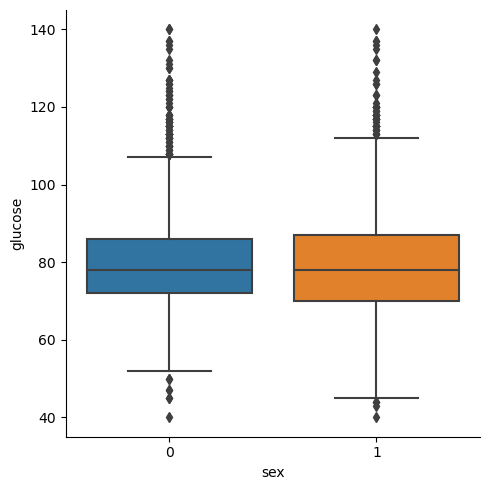

In [40]:
heart = heart.drop(index=heart[heart['glucose'] > 140].index) 
sns.catplot(data=heart,x='sex',y='glucose',kind='box')

In [41]:
heart.shape

(3702, 15)

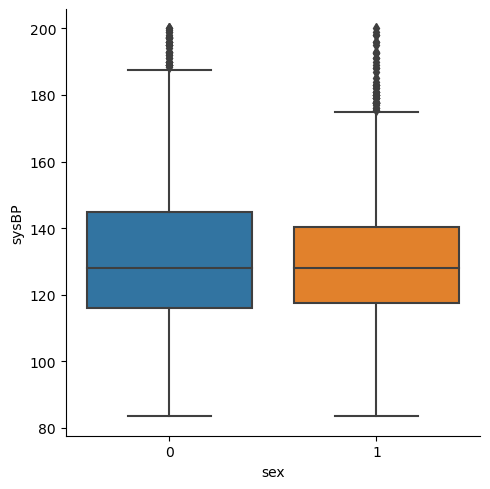

In [42]:
heart =heart.drop(index=heart[heart['sysBP'] > 200].index)
sns.catplot(data=heart,kind='box',x='sex',y='sysBP')

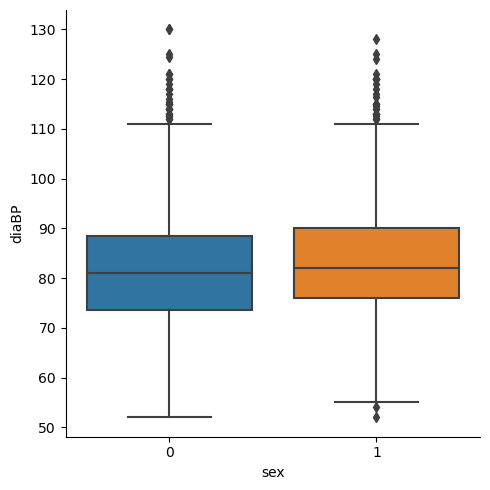

In [43]:
heart =heart.drop(index=heart[heart['diaBP'] > 130].index)
heart =heart.drop(index=heart[heart['diaBP'] <50].index)
sns.catplot(data=heart,kind='box',x='sex',y='diaBP')

In [44]:
heart.shape

(3668, 15)

In [45]:
heart.isnull().sum()

sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
target             0
dtype: int64

In [46]:
heart['target'].value_counts()

target
0    3143
1     525
Name: count, dtype: int64

### Create a sklearn pipeline

In [47]:
X = heart.drop(columns=['target'])
y = heart['target']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
X_train

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1663,0,63,0,0.0,0.0,0,1,0,320.0,155.0,81.0,31.71,64.0,80.0
2526,0,40,0,0.0,0.0,0,0,0,212.0,110.0,70.0,22.98,85.0,85.0
930,0,37,1,20.0,0.0,0,0,0,229.0,111.0,70.0,20.24,80.0,70.0
4183,0,37,0,0.0,0.0,0,0,0,208.0,118.5,70.0,25.09,70.0,85.0
78,0,45,0,0.0,0.0,0,1,0,183.0,151.0,101.0,45.80,80.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1,52,1,30.0,0.0,0,1,0,312.0,148.0,99.0,26.73,75.0,65.0
1482,0,40,0,0.0,0.0,0,0,0,185.0,117.5,72.0,21.12,70.0,79.0
987,1,47,0,0.0,0.0,0,0,0,194.0,115.0,82.0,28.23,48.0,76.0
4057,0,57,1,10.0,1.0,0,1,0,272.0,157.0,80.0,25.15,70.0,95.0


In [50]:
y_train.value_counts()

target
0    2523
1     411
Name: count, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [53]:
y_train.value_counts()

target
1    2523
0    2523
Name: count, dtype: int64

In [54]:
trf2 = ColumnTransformer([
    ('scaled',MinMaxScaler(),slice(0,14))
],remainder='passthrough')

In [55]:
# Feature selection
trf3 = SelectKBest(score_func=chi2,k=14)

In [56]:
# train the model
trf4 = RandomForestClassifier(max_depth=None,
 max_features=0.2,
 max_samples= 0.75,
 n_estimators= 500)


In [57]:
trf5 = BaggingClassifier(
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

In [58]:
pipe = Pipeline([
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf5',trf5)
])

In [59]:
#train
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaled', MinMaxScaler(),
                                                  slice(0, 14, None))])),
                ('trf3',
                 SelectKBest(k=14,
                             score_func=<function chi2 at 0x000002990178ADD0>)),
                ('trf5',
                 BaggingClassifier(max_samples=0.25, n_estimators=500,
                                   oob_score=True, random_state=42))])

In [60]:
#Explore pipe information
pipe.named_steps

{'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaled', MinMaxScaler(), slice(0, 14, None))]),
 'trf3': SelectKBest(k=14, score_func=<function chi2 at 0x000002990178ADD0>),
 'trf5': BaggingClassifier(max_samples=0.25, n_estimators=500, oob_score=True,
                   random_state=42)}

In [61]:
#predict
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7588555858310627

In [63]:
#Exporting the Pipeline
# export 
import pickle
pickle.dump(pipe,open('HeartPredict.pkl','wb'))

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
#randomforest boosting
param_grid = {'n_estimators': [20,60,100,120],
               'max_features': [0.2,0.6,1.0],
               'max_depth': [2,8,None],
              'max_samples':[0.5,0.75,1.0]
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [66]:
rf_grid = GridSearchCV(estimator = trf4, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [67]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=0.2,
                                              max_samples=0.75,
                                              n_estimators=500),
             n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [68]:
rf_grid.best_score_

0.8999334700566191

In [69]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 100}

In [70]:
#bagging dt
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.25,0.5,0.75,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.25,0.5,0.75,1.0],
    }

In [71]:
dt_grid = GridSearchCV(estimator = trf4, 
                       param_grid = parameters, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [72]:
dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\narendra tekale\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
375 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\narendra tekale\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\narendra tekale\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 379, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_me

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=0.2,
                                              max_samples=0.75,
                                              n_estimators=500),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'max_samples': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'n_estimators': [50, 100, 500]},
             verbose=2)

In [73]:
dt_grid.best_score_

0.7826131156227614

In [74]:
dt_grid.best_params_

{'bootstrap': True,
 'max_features': 0.1,
 'max_samples': 0.1,
 'n_estimators': 50}